Data Visualisation \ Matplotlib \ Seaborn

https://matplotlib.org/stable/users/index.html

https://www.tutorialspoint.com/matplotlib/index.htm

https://realpython.com/python-matplotlib-guide/

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Chiziqli Grafiklar -- Line plots -> Chiziqli grafiklarning asosiy vazifasi biror jarayon/hodisani vaqt o'tishi o'zgarishini (tendensiyasini) kuzatish

Ustunli grafiklar -- Bar graphs --> Solishtirish uchun.

Issiqlik xaritasi -- Heatmap

Tarqoqlik grafiki -- Scatter plot

Taqsimot grafiki -- Distribution

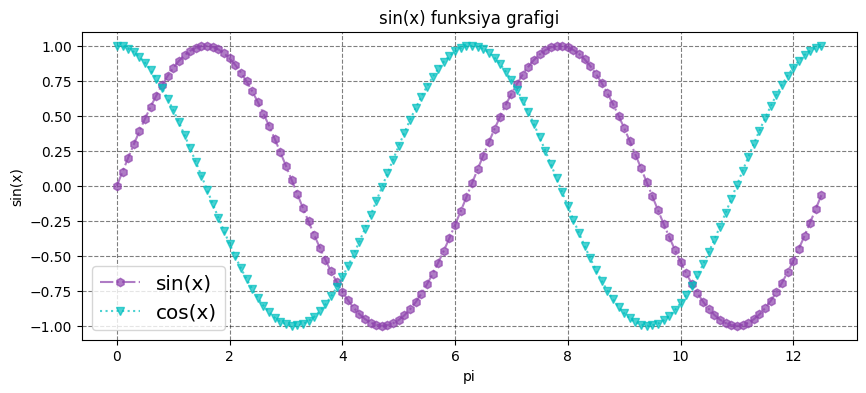

In [ ]:
x = np.arange(0, 4 * np.pi, 0.1)
sin = np.sin(x) # sin(x)
cos = np.cos(x) # cos(x)

plt.figure(figsize=(10,4)) # rasmning hajmi
# sin(x) grafigi
plt.plot(x, sin,
         linewidth=1.5, # chiziq qalinligi (0.5 dan 3 gacha)
         linestyle='-.', # chiziq shakli (-) oddiy chiziq , (--) yuliq chiziq , (-.) chiziq va nuqta
         color='#8E44AD', # b'-(blue) 'c'-(cyan) 'g'(green)'k'(black) 'm'(magenta) 'r'(red) 'y'(yellow)
         alpha=0.7, # chiziq shaffofligi (0 shaffof, 0.5 yarim-shaffof, 1 shaffof emas)
         marker='h') # '.' - nuqta 'o' - aylana 'v' - pastga qaragan uchburchak '^' - tepaga qaragan uchburchak '*' - yulduz

# cos(x) grafigi
plt.plot(x, cos,
         linewidth=1.5,
         linestyle=':',
         color='c',
         alpha=0.7,
         marker='v')

# Grafik nomi:
plt.title('sin(x) funksiya grafigi')
# x - o'q nomi:
plt.xlabel("pi")
# y - o'q nomi:
plt.ylabel("sin(x)")
# Har bir chiziq haqida ma'lumot:
plt.legend(['sin(x)','cos(x)'], loc=0, fontsize='x-large')
plt.grid(color='k', alpha=0.5, linestyle='--') # setkani o'zgartirish
plt.show()

# Rasmni saqlab olamiz:
plt.savefig('sin-cos-grafik.png')

# Saqlangan rasmni ochish
# from IPython.display import Image
# Image('sin-cos-grafik.png')

https://jovian.com/outlink?url=https%3A%2F%2Fhtmlcolorcodes.com%2F  ranglar uchun HEX va RGBA qiymatlar

**Seaborn** kutubxonasi

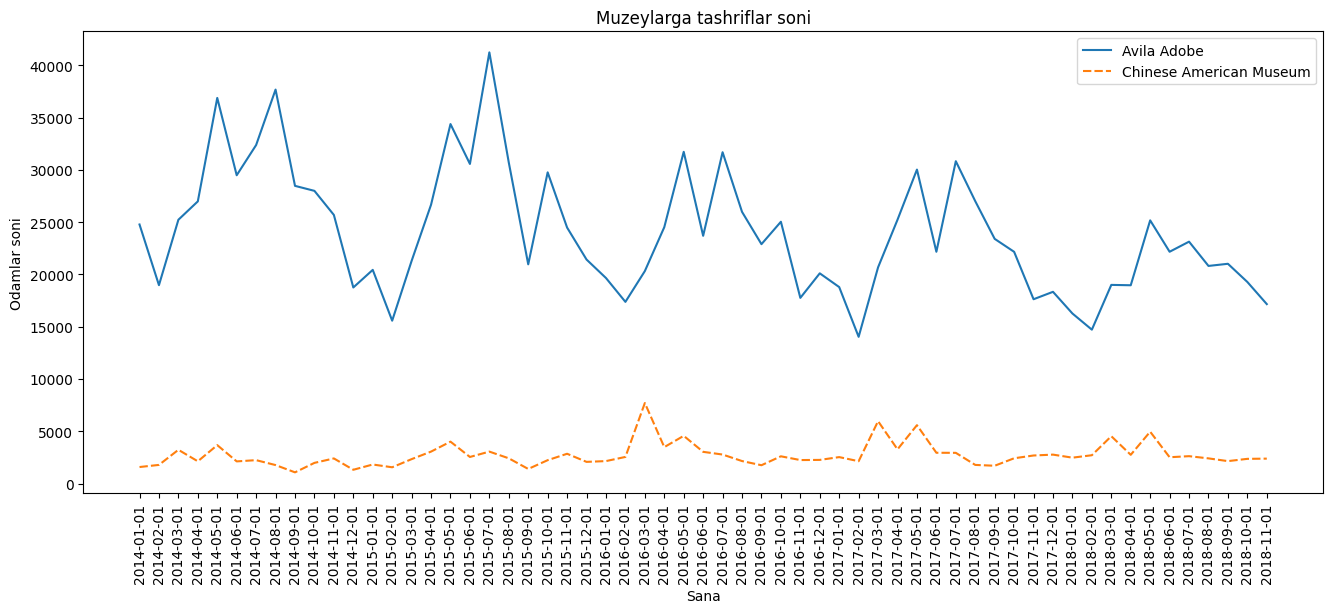

In [ ]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0)

plt.figure(figsize=(16,6))
plt.title("Muzeylarga tashriflar soni")
plt.xlabel("Sana")
plt.xticks(rotation=90) # x o'qidagi yozuvlarni 90 gradusga aylantiramiz
plt.ylabel("Odamlar soni")
sns.lineplot(data=df[['Avila Adobe','Chinese American Museum']])
plt.show()

**Bar plot**

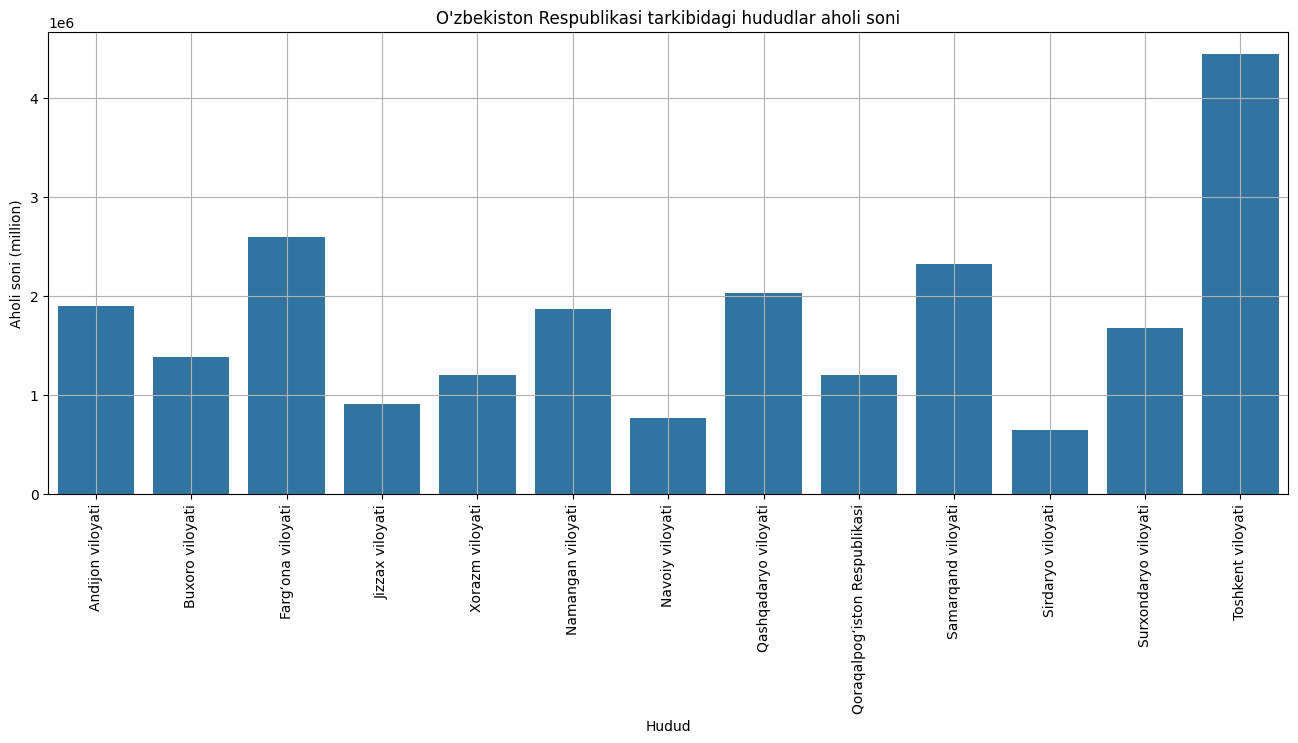

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/uzbekistan.csv", index_col=0)
df.columns = ['maydon','aholi']

plt.figure(figsize=(16,6))
sns.barplot(x=df.index, y=df['aholi'])

plt.title("O'zbekiston Respublikasi tarkibidagi hududlar aholi soni")
plt.xlabel("Hudud")
plt.ylabel("Aholi soni (million)")
plt.grid() # Chizmaga gorizontal va vertikal chiziqlar (setka) qo'shish
plt.xticks(rotation=90)
plt.show()

**melt** funksiyasi jadvlani eniga uzundan bo'yiga uzun holatga olib kelishda qo'llaniladi. Bunda df dagi bir nechta ustunlarni yagona variable ustuniga keltirish mumkin. Qiymatlar esa har bir variable uchun value ustunida ko'rsatiladi.

Guruhlangan ustunli grafik chizish uchun **catplot** metodidan foydalanamiz. catplot yordamida turli grafiklar chizish mumkin, shuning **kind='bar'** parametri yordamida aynan bar grafik chizmoqchi ekanmizni ko'rsatamiz.
So'ngra, x va y o'qi qiymatlarini ko'rsatamiz va eng muhimi guruhlash qaysi ustun bo'yicha bo'lishini ko'rsatish uchun **hue='variable'** parametridan foydalanmiz

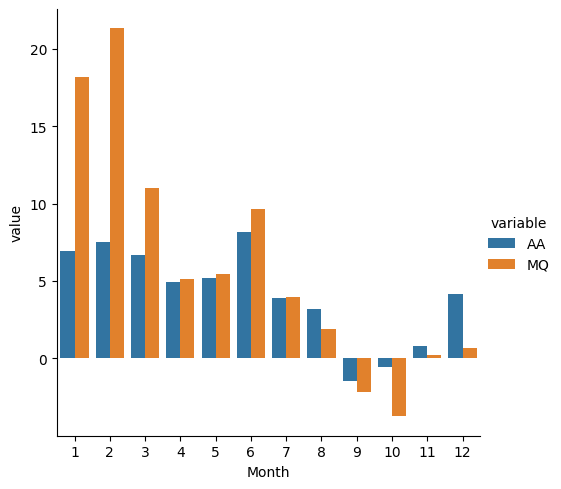

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/flight_delays.csv")

data = pd.melt(df, id_vars=['Month'], value_vars=['AA','MQ']) # .melt() yordamida istalgancha ajratib olish mumkin:
sns.catplot(data=data, kind="bar", x="Month", y="value", hue="variable")
plt.show()

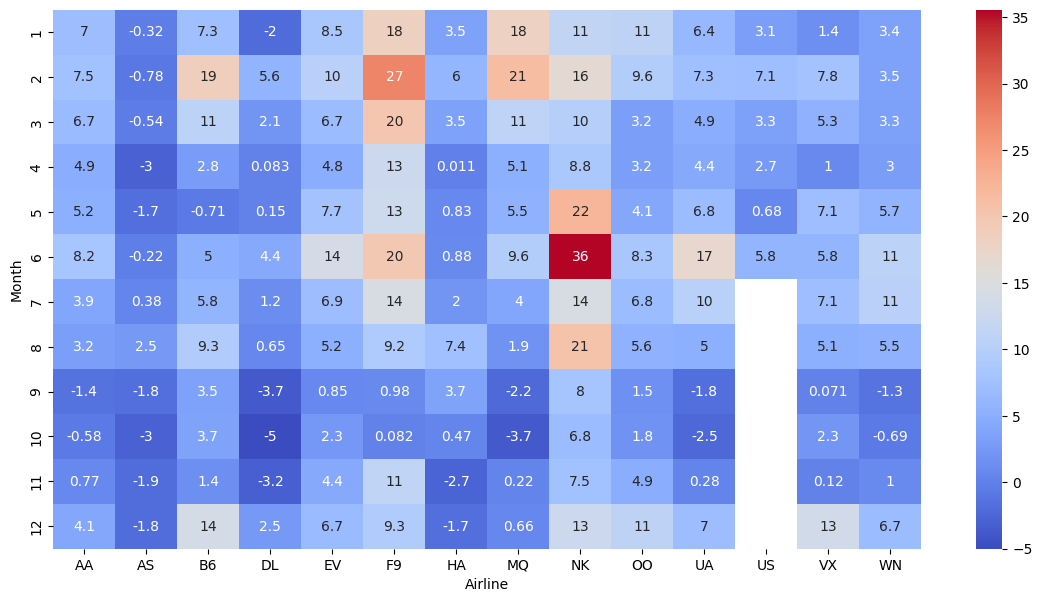

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(data=df.set_index('Month'), cmap="coolwarm", annot=True)
plt.xlabel("Airline")
plt.show()

**Heatmap**

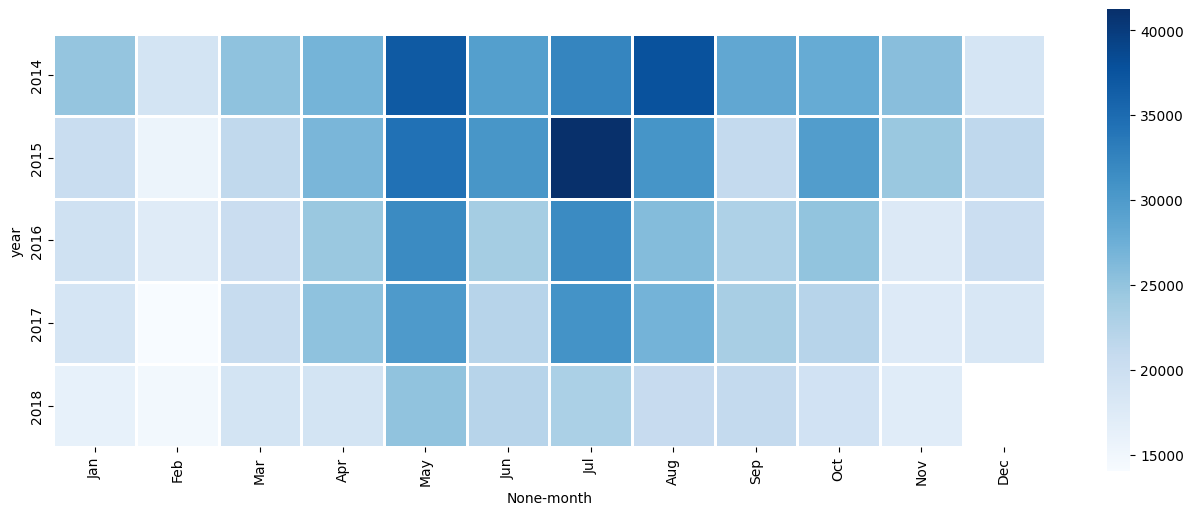

In [ ]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0, parse_dates=[0], usecols=[0,1])
df['month'] = [i.month for i in df.index]
df['year'] = [i.year for i in df.index]

df_m = df.groupby(['month','year']).max().unstack(level=0)

plt.figure(figsize=(16,6))
sns.heatmap(data=df_m, cmap="Blues", linewidths=1, square=True)
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels) # x o'qi ustuunlarni nomlash
plt.show()

cmap uchun mavjud ranglar: ‘Accent’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BuGn’,‘BuPu’,‘CMRmap’,‘Dark2’, ‘GnBu’,‘Greens’, ‘Greys’, ‘OrRd’, ‘Oranges’,‘PRGn’, ‘Paired’, ‘Pastel1’, ‘Pastel2’, ‘PiYG’,‘PuBu’, ‘PuBuGn’, ‘PuOr’,‘PuRd’, ‘Purples’, ‘RdBu’,‘RdGy’, ‘RdPu’, ‘RdYlBu’, ‘RdYlGn’, , ‘Reds’, ‘Set1’, ‘Set2’, ‘Set3’, ‘Spectral’,‘Wistia’, ‘YlGn’, ‘YlGnBu’, ‘YlOrRd’, ‘afmhot’,‘autumn’, ‘binary’,  ‘bone’, ‘brg’,‘bwr’, ‘cividis’, ‘cool’,‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘cubehelix’, ‘flag’,‘gist_earth’ .......

**Scatter plot - Tarqoqlik diagrammasi**

Scatter plot yordamida ma'lumotlar qanchalik tarqoq ekanin kuzatishimiz mumkin. Bu grafik ham bir nechta ustunlar orasidagi bog'liqlikni (korrelyasiya) ko'rishga xizmat qiladi.

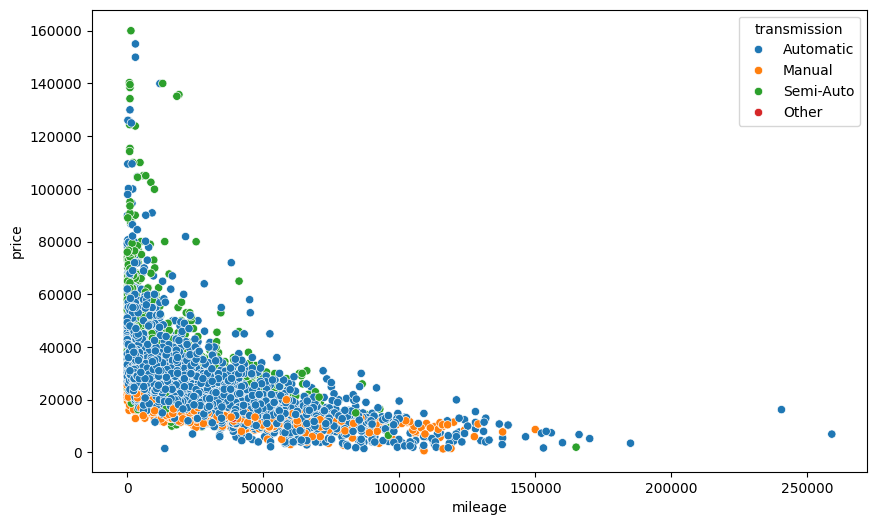

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")

df = df[df.year!=1970] # yili 1970 ga teng bo'lmagan qatorlarni saqlab qolamiz

plt.figure(figsize=(10,6))

# hue parametri orqali 3 - o'zgaruvchini qo'shish mumkin , 4-o'zgaruvchini qo'shish uchun style parametri
sns.scatterplot(data=df, x=df['mileage'], y=df['price'], hue="transmission", s=50) # s - nuqtalar hajmi
# sns.regplot(data=df, x='year', y='price') --> regressiya chizig'i (regression line)
plt.show()

In [ ]:
# sns.swarmplot(data=df, x=df['transmission'], y=df['price']) # Scatter plotning ayan bir ko'rinishi bu Swarm plot.

**Distribution - taqsimot**

Taqsimot grafik - o'zgaruvchi (ustun)da qanday qiymatlar mavjudligi va ularning ehtimolligini ko'rsatuvchi grafik.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df=df[df.year>=2010] # 2010-yildan keyin chiqqan mashinalarni saqlab qolamiz
df=df[df.transmission!='Other'] # Faqat avtomat, mexanik va yarim-avtomat mashinalarni olib qolamiz
df=df[df.fuelType!='Other'] # Faqat benzin, dizel va gibrid mashinalarni olib qolamiz


**displot**-turli taqsimotlarni jamlaydigan funksiya

displot yoki histplot ikkisining farqi histplot kdeplot, ecdfplot funksiyalari yordamida chizmaga ko'proq o'zgartirishlar kiritish mumkin.

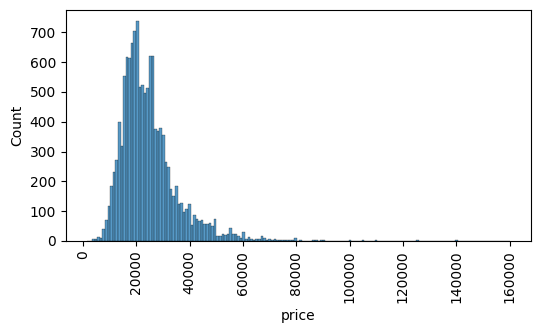

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x='price')
plt.xticks(rotation=90)
plt.show()

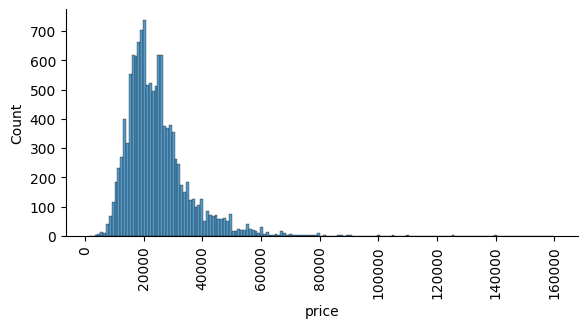

In [ ]:
sns.displot(data=df, x='price', height=3, aspect=2) # figsize orniga height va aspect beriladi
plt.xticks(rotation=90)
plt.show()

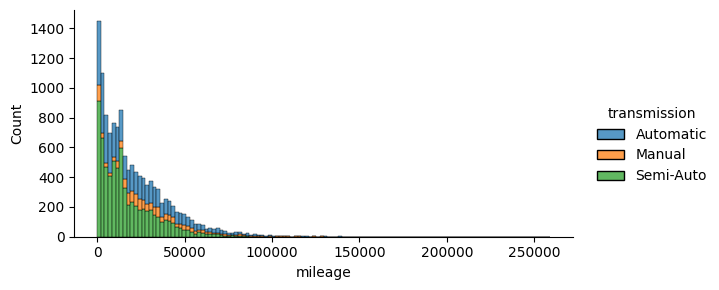

In [ ]:
# hue yordamida 2 - parametr qo'shiladi \ multiple="stack" ranglarni ajratib ko'rsatadi
sns.displot(data=df, x="mileage", hue="transmission", multiple="stack", height=3, aspect=2)
plt.show()

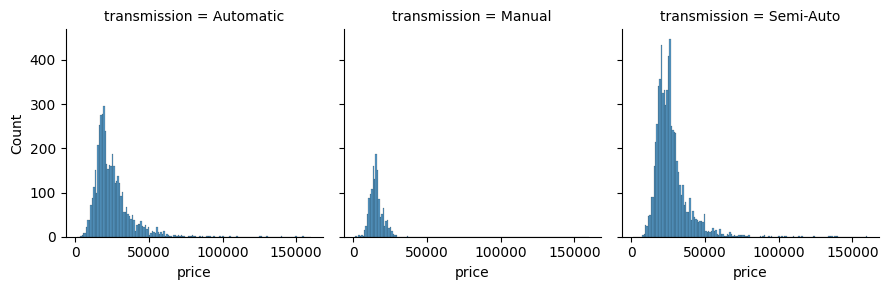

In [ ]:
# col parametri yordamida har bir grafikni ajratib chizish mumkin:
sns.displot(data=df, x="price", col="transmission", height=3, aspect=1)
plt.show()

**KDE - Kernel Density Estimation**

KDE-tasodifiy qiymatlar zichligini ko'rsatuvchi grafik

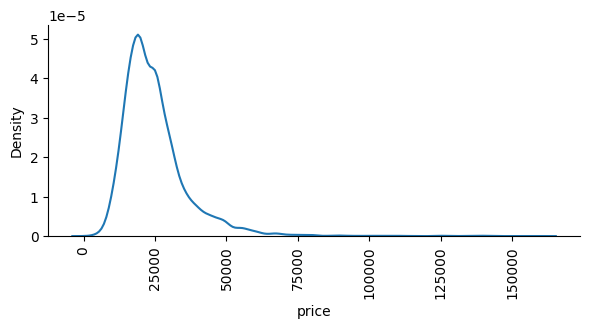

In [ ]:
#displot
sns.displot(data=df, x='price', kind='kde', height=3, aspect=2) # height va aspect grafik hajmini berish uchun
plt.xticks(rotation=90)
plt.show()

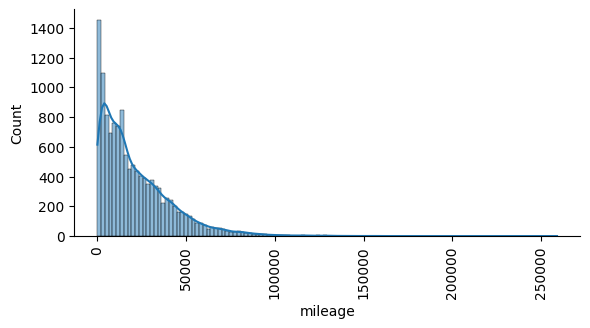

In [ ]:
# displot yordamida Distribution va KDE jamlab chizish ham mumkin:
sns.displot(data=df, x='mileage', kde=True, height=3, aspect=2)
plt.xticks(rotation=90)
plt.show()

<ipython-input-40-4abdeb564738>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='price', hue='transmission', shade=True)


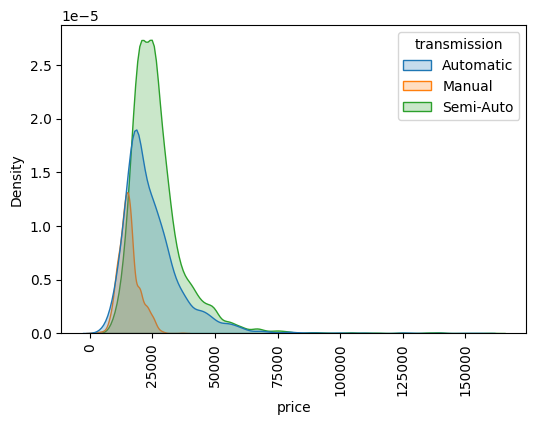

In [ ]:
#kdeplot
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='price', hue='transmission', shade=True)
plt.xticks(rotation=90)
plt.show()

# displot va hue yordamidda ham chizish mumkin lekin shade funksiyasi yo'q

**CDF - cumulative distribution function**

Kumulyativ taqsimot funksiyasi - berilgan qiymatning ehtimolligini ko'rsatuvchi parametr.

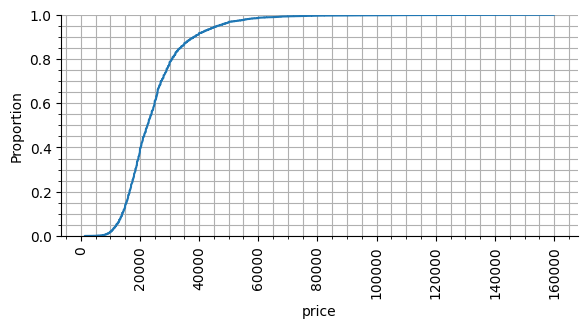

In [ ]:
sns.displot(data=df, x="price", kind="ecdf", height=3, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both') # setka (major, minor, both) qiymatlarini berib ko'ring
plt.minorticks_on()
plt.show()

**subplot** yordamida 1 ta chizmada bir nechta grafiklarni chizishimiz mumkin.

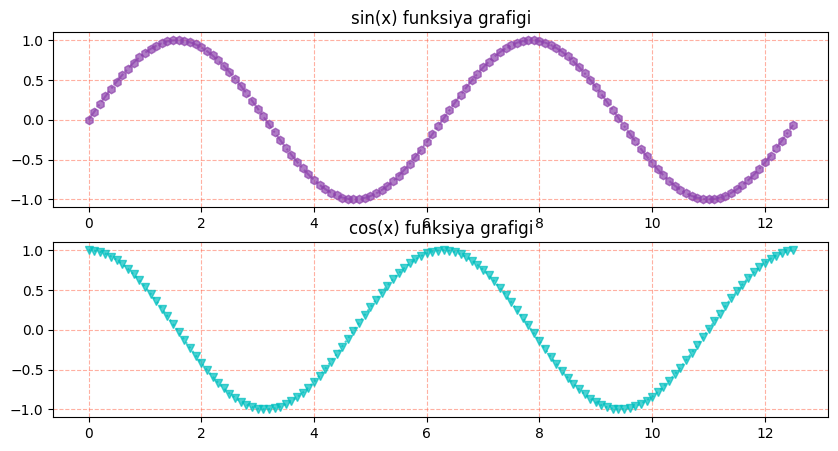

In [ ]:
x = np.arange(0, 4 * np.pi, 0.1)
sin = np.sin(x) # sin(x)
cos = np.cos(x) # cos(x)

plt.figure(figsize=(10,5))
plt.subplot(2,1,1) # 2 - jami qatorlar soni, 1 - jami ustunlar soni, 1-grafik
# sin(x) grafigi
plt.plot(x, sin,
         linewidth=1.5,
         linestyle='-.',
         color='#8E44AD',
         alpha=0.7,
         marker='h')
plt.title('sin(x) funksiya grafigi')
plt.grid(color='tomato', alpha=0.5, linestyle='--') # setkani o'zgartirish

plt.subplot(2,1,2) # # 2 - jami qatorlar soni, 1 - jami ustunlar soni, 2-grafik
# cos(x) grafigi
plt.plot(x, cos,
         linewidth=1.5,
         linestyle=':',
         color='c',
         alpha=0.7,
         marker='v')
plt.title('cos(x) funksiya grafigi')
plt.grid(color='tomato', alpha=0.5, linestyle='--') # setkani o'zgartirish

plt.show()

**seaborn va subplot**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df=df[df.year>=2010] # 2010-yildan keyin chiqqan mashinalarni saqlab qolamiz
df=df[df.transmission!='Other'] # Faqat avtomat, mexanik va yarim-avtomat mashinalarni olib qolamiz
df=df[df.fuelType!='Other'] # Faqat benzin, dizel va gibrid mashinalarni olib qolamiz


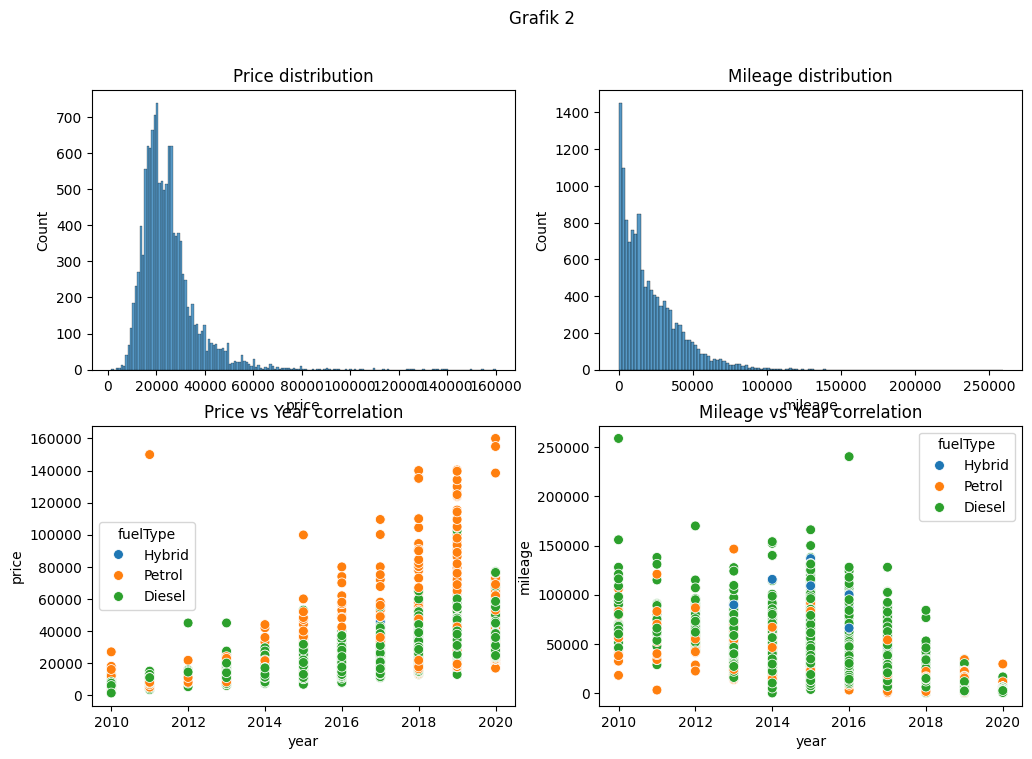

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,8)) # 2,1 qilib 2 ta grafikni berish mumkin
# Umumiy chizma nomini beramiz:
fig.suptitle("Grafik 2")
sns.histplot(ax=ax[0, 0], data=df, x='price')
sns.histplot(ax=ax[0, 1], data=df, x='mileage')
sns.scatterplot(ax=ax[1, 0], data=df, x=df['year'], y=df['price'], hue="fuelType", s=50)
sns.scatterplot(ax=ax[1, 1], data=df, x=df['year'], y=df['mileage'], hue="fuelType", s=50)
# Har bir grafik uchun nom:
ax[0,0].set_title("Price distribution")
ax[0,1].set_title("Mileage distribution")
ax[1,0].set_title("Price vs Year correlation")
ax[1,1].set_title("Mileage vs Year correlation")
plt.show()

**LUX** - Vizualizasiyani osonlashtiruvchi tashqi kutubxona

LINK: https://github.com/lux-org/lux



In [60]:
!pip install lux-api

In [ ]:
# jupyter nbextension install --py luxwidget # jupyter notebook da ishlatish uchun
# jupyter nbextension enable --py luxwidget

In [61]:
# from google.colab import output
# output.enable_custom_widget_manager()
# import lux

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df=df[df.year>=2010] # 2010-yildan keyin chiqqan mashinalarni saqlab qolamiz
df=df[df.transmission!='Other'] # Faqat avtomat, mexanik va yarim-avtomat mashinalarni olib qolamiz
df=df[df.fuelType!='Other'] # Faqat benzin, dizel va gibrid mashinalarni olib qolamiz
df['year'] = pd.to_datetime(df['year'], format='%Y')


In [63]:
# df.intent = ["price","mileage"]


/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/usr/local/lib/python3.10/dist-packages/lux/executor/PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()